## Implementing Autoencoders using Keras

In this lab lesson, we will look into the implementation of Autoencoders using Keras. The tutorial is based on the code provided by https://blog.keras.io/building-autoencoders-in-keras.html.

## Load MNIST Dataset
Load MNIST dataset from keras.datasets

In [212]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print("=============================================================")
print("Before Conversion:")
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("=============================================================")
print("After Conversion:")
print(x_train.shape)
print(x_test.shape)
print("=============================================================")

Before Conversion:
(60000, 28, 28)
(10000, 28, 28)
After Conversion:
(60000, 784)
(10000, 784)


## Helper Functions
Defining helper functions to plot the results

In [213]:
#Function to plot loss and accuracy curves
def plot_curve(log):
    N_train = len(log.history['loss'])
    N_valid = len(log.history['val_loss'])
    
    plt.figure(figsize=(18,4))
    
    # Plot loss on training and validation set
    plt.plot(log.history['loss'])
    plt.plot(np.linspace(0,N_train-1,N_valid), log.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.grid('on')
    plt.legend(['Train', 'Validation'])
    
    plt.show()

def pred(imgs):
    n = 10  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def denoise_pred(imgs):
    n = 10  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def cifar(x,y):
    n = 10 
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(y[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## 1. Autoencoder using MLP

### 1.1 Model Definition

In [193]:
#define encoder network
encoder = keras.Sequential(name='Encoder')
encoder.add(layers.Dense(128, activation='relu',input_shape=(784,),name='Encoder_Layer1'))
encoder.add(layers.Dense(64, activation='relu',name='Encoder_Layer2'))
encoder.add(layers.Dense(32, activation='relu',name='Encoder_Layer3'))
encoder.summary()

#define decoder network
decoder = keras.Sequential(name='Decoder')
decoder.add(layers.Dense(64, activation='relu', input_shape=(32,),name='Decoder_Layer1'))
decoder.add(layers.Dense(128, activation='relu',name='Decoder_Layer2'))
decoder.add(layers.Dense(784, activation='sigmoid',name='Output'))
decoder.summary()

#define autoencoder by combining encoder and decoder
input_img = keras.Input(shape=(784,),name='Input_Layer')
z = encoder(input_img)
output_img = decoder(z)
autoencoder = keras.models.Model(inputs=input_img, outputs=output_img, name='Autoencoder')
autoencoder.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder_Layer1 (Dense)      (None, 128)               100480    
                                                                 
 Encoder_Layer2 (Dense)      (None, 64)                8256      
                                                                 
 Encoder_Layer3 (Dense)      (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Decoder_Layer1 (Dense)      (None, 64)                2112      
                                                                 
 D

### 1.2 Model Training

Epoch 1/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0699 - val_loss: 0.0430
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0350 - val_loss: 0.0295
Epoch 3/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0265 - val_loss: 0.0244
Epoch 4/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0227 - val_loss: 0.0217
Epoch 5/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 6/50
188/188 [==============================] - 2s 9ms/step - loss: 0.0194 - val_loss: 0.0189
Epoch 7/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0181 - val_loss: 0.0178
Epoch 8/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0169 - val_loss: 0.0164
Epoch 9/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0159 - val_loss: 0.0157
Epoch 10/50
188/188 [==============================] - 1s 7ms/step - loss: 0.0151 - val_loss: 0.0148

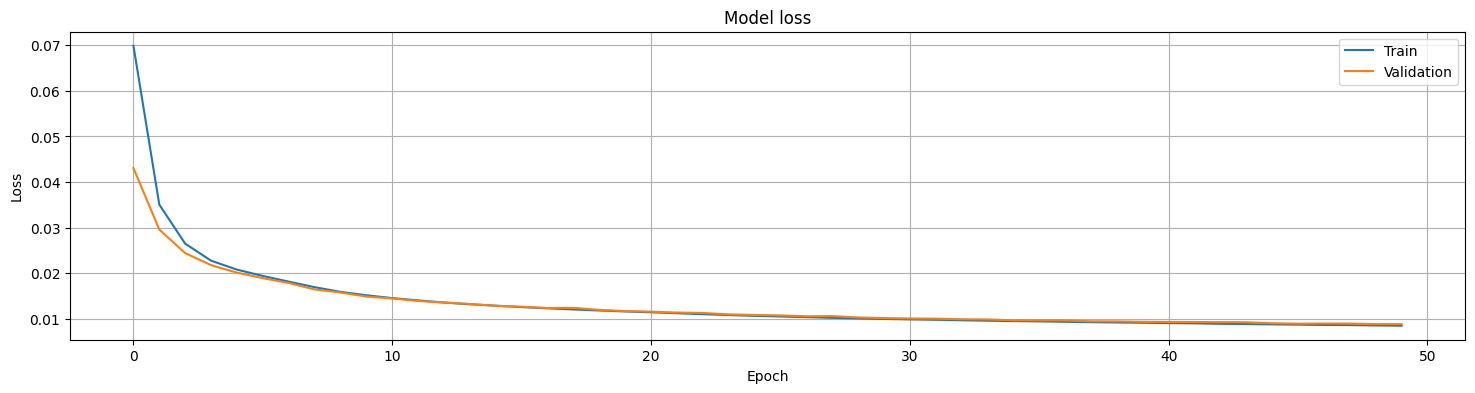

In [194]:
#Configure the model for training
autoencoder.compile(optimizer='adam', loss='mse')

#Model Training
log = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

#Plot loss curves
plot_curve(log)

### 1.3 Display Results

313/313 [==============================] - 1s 2ms/step


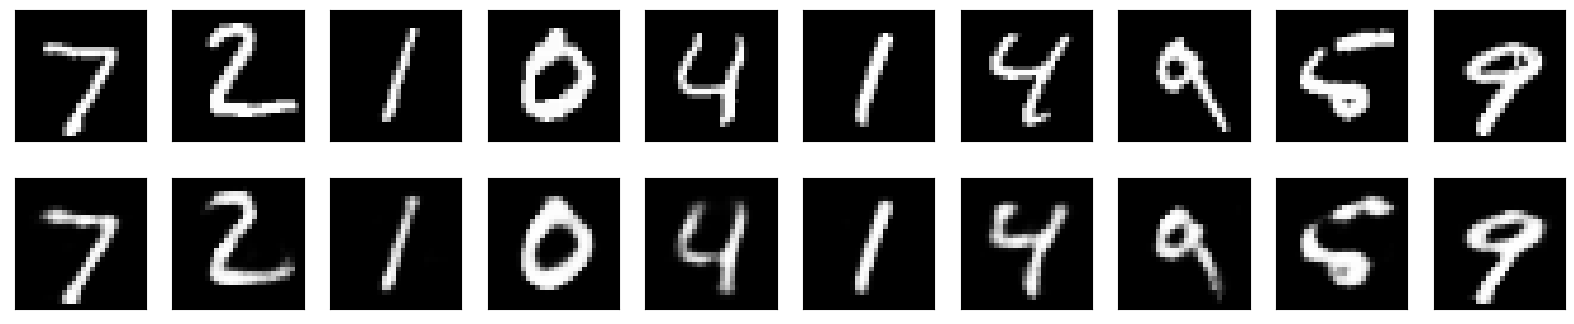

In [195]:
test = autoencoder.predict(x_test)
pred(test)

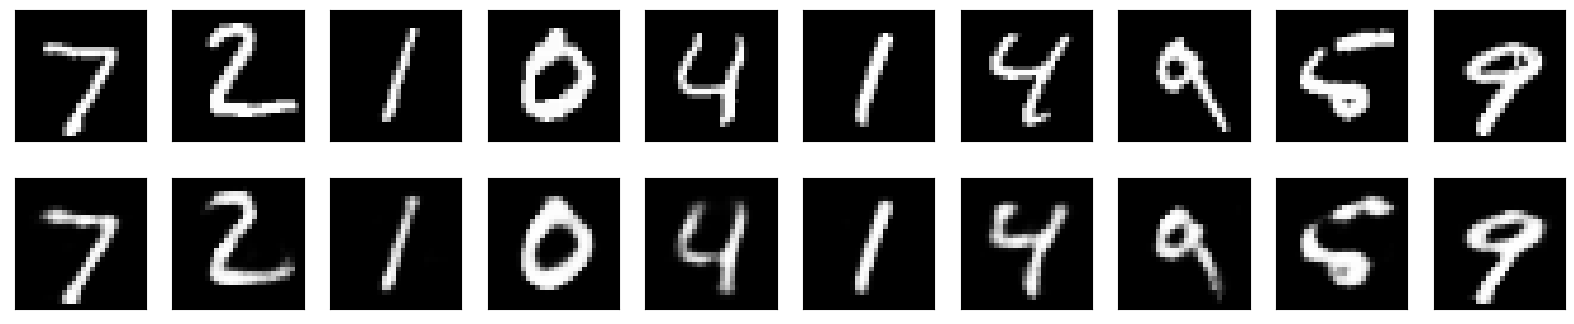

In [196]:
#Get the encoded values for test images
encoded_img = encoder(x_test)

#Get the decoded images from the encoded values
decoded_img = decoder(encoded_img)

#Plot test and decoded images
pred(decoded_img.numpy())

## 2. Autoencoder using CNN

### 2.1 Reshaping data 

In [214]:
x_train = x_train.reshape((len(x_train), 28,28,1))
x_test = x_test.reshape((len(x_test), 28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### 2.2 Model Definition

In [198]:
#define encoder network
encoder_cnn = keras.Sequential(name='Encoder_CNN')
encoder_cnn.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(28,28,1), name='E1'))
encoder_cnn.add(layers.MaxPooling2D((2, 2), padding='same', name='E2'))
encoder_cnn.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', name='E3'))
encoder_cnn.add(layers.MaxPooling2D((2, 2), padding='same', name='E4'))
encoder_cnn.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', name='E5'))
encoder_cnn.add(layers.MaxPooling2D((2, 2), padding='same', name='E6'))
encoder_cnn.add(layers.Flatten(name='E7'))
encoder_cnn.add(layers.Dense(128, activation='relu',name='E8'))
encoder_cnn.summary()

#define decoder network
decoder_cnn = keras.Sequential(name='Decoder_CNN')
decoder_cnn.add(layers.Dense(256, input_shape=(128,), activation='relu',name='D1'))
decoder_cnn.add(layers.Reshape((4,4,16),name='D2'))
decoder_cnn.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', name='D3'))
decoder_cnn.add(layers.UpSampling2D((2, 2), name='D4'))
decoder_cnn.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', name='D5'))
decoder_cnn.add(layers.UpSampling2D((2, 2), name='D6'))
decoder_cnn.add(layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', name='D7'))
decoder_cnn.add(layers.UpSampling2D((2, 2), name='D8'))
decoder_cnn.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='Output'))
decoder_cnn.summary()

#define autoencoder by combining encoder and decoder
input_img = keras.Input(shape=(28,28,1), name='Input_Layer')
z = encoder_cnn(input_img)
output_img = decoder_cnn(z)
autoencoder_cnn = keras.models.Model(inputs=input_img, outputs=output_img, name='Autoencoder_CNN')
autoencoder_cnn.summary()

Model: "Encoder_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 E1 (Conv2D)                 (None, 28, 28, 8)         80        
                                                                 
 E2 (MaxPooling2D)           (None, 14, 14, 8)         0         
                                                                 
 E3 (Conv2D)                 (None, 14, 14, 8)         584       
                                                                 
 E4 (MaxPooling2D)           (None, 7, 7, 8)           0         
                                                                 
 E5 (Conv2D)                 (None, 7, 7, 16)          1168      
                                                                 
 E6 (MaxPooling2D)           (None, 4, 4, 16)          0         
                                                                 
 E7 (Flatten)                (None, 256)               

### 2.3 Model Training

Epoch 1/50
375/375 [==============================] - 9s 21ms/step - loss: 0.1848 - val_loss: 0.1427
Epoch 2/50
375/375 [==============================] - 5s 13ms/step - loss: 0.1322 - val_loss: 0.1258
Epoch 3/50
375/375 [==============================] - 5s 14ms/step - loss: 0.1203 - val_loss: 0.1174
Epoch 4/50
375/375 [==============================] - 6s 15ms/step - loss: 0.1138 - val_loss: 0.1112
Epoch 5/50
375/375 [==============================] - 5s 14ms/step - loss: 0.1095 - val_loss: 0.1091
Epoch 6/50
375/375 [==============================] - 8s 22ms/step - loss: 0.1065 - val_loss: 0.1063
Epoch 7/50
375/375 [==============================] - 8s 20ms/step - loss: 0.1041 - val_loss: 0.1051
Epoch 8/50
375/375 [==============================] - 8s 22ms/step - loss: 0.1020 - val_loss: 0.1019
Epoch 9/50
375/375 [==============================] - 6s 15ms/step - loss: 0.1003 - val_loss: 0.0999
Epoch 10/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0990 - val_lo

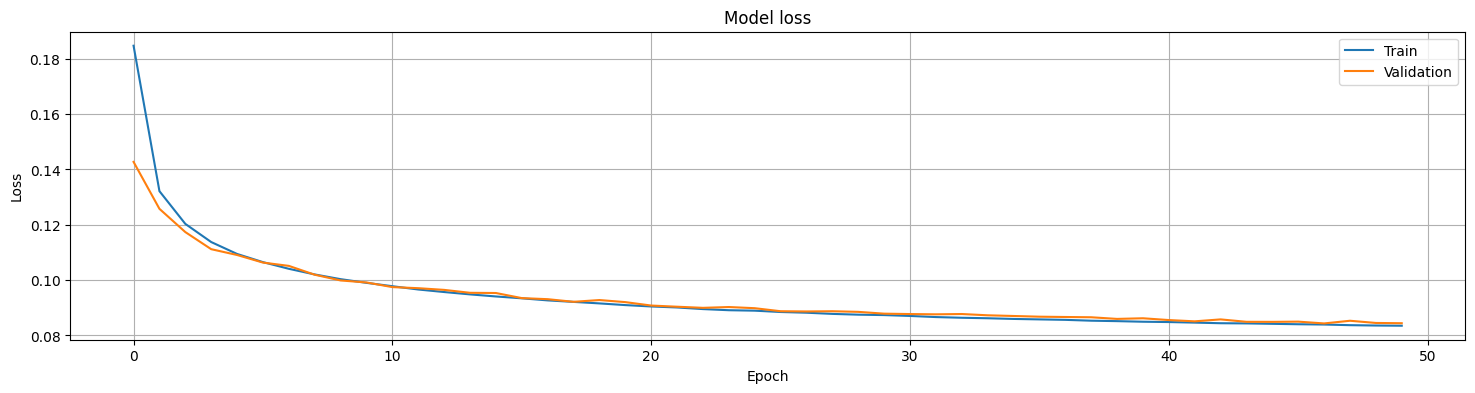

In [199]:
#Configure the model for training
autoencoder_cnn.compile(optimizer='adam', loss='binary_crossentropy')

#Model Training
log = autoencoder_cnn.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

#Plot loss curves
plot_curve(log)

### 2.4 Display Results

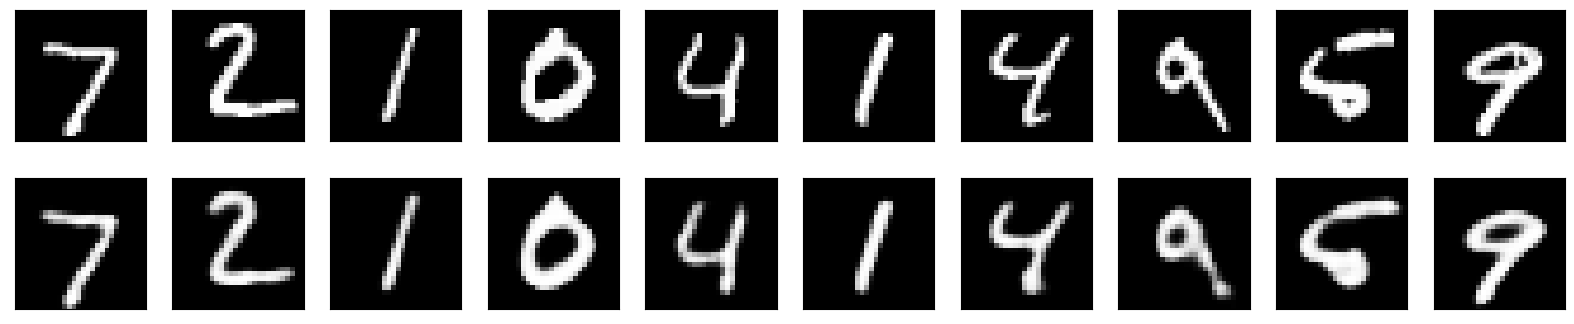

In [200]:
#Get the encoded values for test images
encoded_img = encoder_cnn(x_test)

#Get the decoded images from the encoded values
decoded_img = decoder_cnn(encoded_img)

#Plot test and decoded images
pred(decoded_img.numpy())

## 3. Autoencoder using Transposed Convolution

### 3.1 Model Definition

In [201]:
#define encoder network
encodertc = keras.Sequential(name='Encoder_CNN')
encodertc.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(28,28,1), name='E1'))
encodertc.add(layers.MaxPooling2D((2, 2), padding='same', name='E2'))
encodertc.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', name='E3'))
encodertc.add(layers.MaxPooling2D((2, 2), padding='same', name='E4'))
#flatten
#dense
encodertc.summary()

#define decoder network
decodertc = keras.Sequential(name='Decoder_Transpose_Conv')
#dense
#reshape
decodertc.add(layers.Conv2DTranspose(32, (3, 3), input_shape=(7,7,32),activation='relu', padding='same', 
                                    strides=2, kernel_initializer='he_normal', name='D1'))
decodertc.add(layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', 
                                    strides=2, kernel_initializer='he_normal', name='D2'))
decodertc.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='Output'))
decodertc.summary()

#define autoencoder by combining encoder and decoder
input_img = keras.Input(shape=(28,28,1), name='Input_Layer')
z = encodertc(input_img)
output_img = decodertc(z)
autoencodertc = keras.models.Model(inputs=input_img, outputs=output_img, name='Fully_Convolutional_Autoencoder')
autoencodertc.summary()

Model: "Encoder_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 E1 (Conv2D)                 (None, 28, 28, 32)        320       
                                                                 
 E2 (MaxPooling2D)           (None, 14, 14, 32)        0         
                                                                 
 E3 (Conv2D)                 (None, 14, 14, 32)        9248      
                                                                 
 E4 (MaxPooling2D)           (None, 7, 7, 32)          0         
                                                                 
Total params: 9568 (37.38 KB)
Trainable params: 9568 (37.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Decoder_Transpose_Conv"
_________________________________________________________________
 Layer (type)                Output Shape              

### 3.2 Model Training

Epoch 1/5
375/375 [==============================] - 6s 13ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 2/5
375/375 [==============================] - 5s 12ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 3/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 4/5
375/375 [==============================] - 4s 12ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 5/5
375/375 [==============================] - 5s 12ms/step - loss: 0.0043 - val_loss: 0.0043


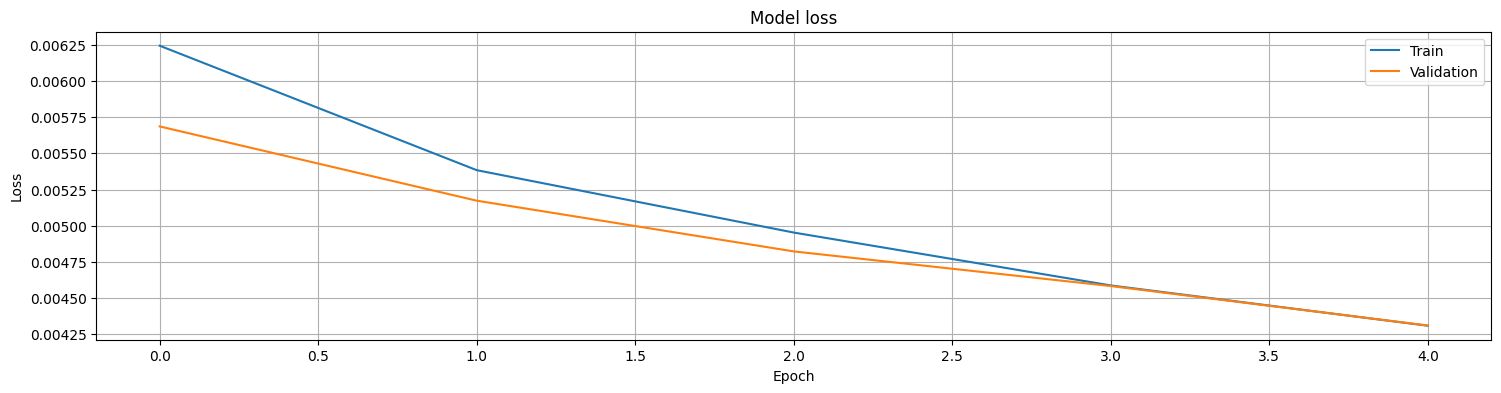

In [202]:
#Configure the model for training
autoencoder_tcnn.compile(optimizer='adam', loss='mse')

#Model Training
log = autoencoder_tcnn.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_split=0.2)

#Plot loss curves
plot_curve(log)

### 3.3 Display Results

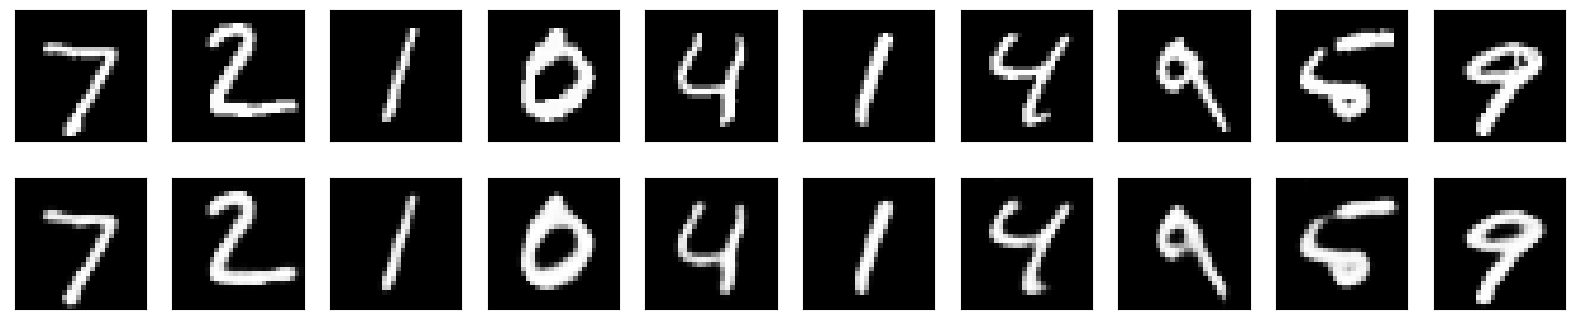

In [203]:
#Get the encoded values for test images
encoded_img = encoder_tc(x_test)

#Get the decoded images from the encoded values
decoded_img = decoder_tc(encoded_img)

#Plot test and decoded images
pred(decoded_img.numpy())

## 4. Image Denoising using Fully Convolutional Autoencoder

### 4.1 Preparing Noisy Data

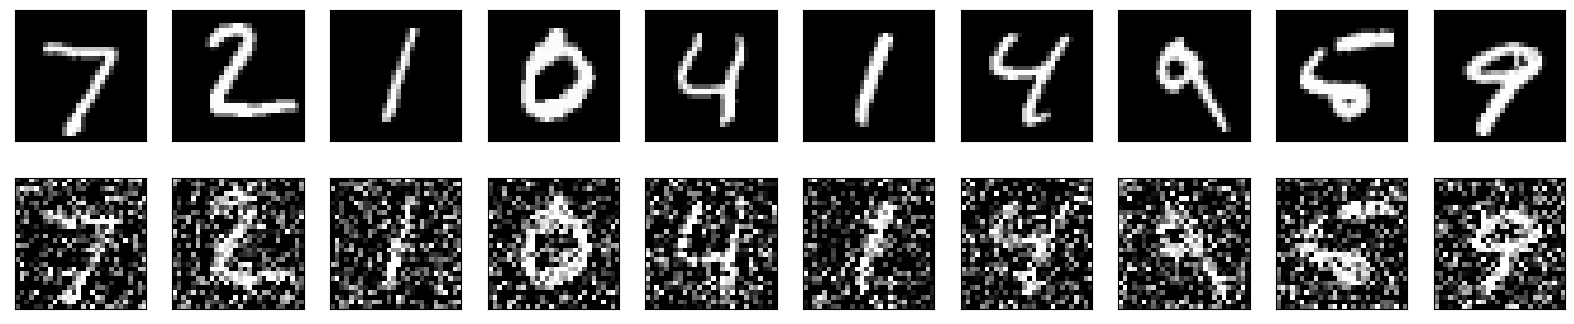

In [215]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

pred(x_test_noisy)

### 4.2 Model Definition

In [216]:
#define encoder network
encoder1 = keras.Sequential(name='Encoder_CNN')
encoder1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1), name='E1'))
encoder1.add(layers.MaxPooling2D((2, 2), padding='same', name='E2'))
encoder1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='E3'))
encoder1.add(layers.MaxPooling2D((2, 2), padding='same', name='E4'))
encoder1.summary()

#define decoder network
decoder1 = keras.Sequential(name='Decoder_CNN')
decoder1.add(layers.Conv2DTranspose(32, (3, 3), input_shape=(7,7,32),activation='relu', padding='same', 
                                    strides=2, name='D1'))
decoder1.add(layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', 
                                    strides=2, name='D2'))
decoder1.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='Output'))
decoder1.summary()

#define autoencoder by combining encoder and decoder
input_img = keras.Input(shape=(28,28,1), name='Input_Layer')
z = encoder1(input_img)
output_img = decoder1(z)
autoencoder1 = keras.models.Model(inputs=input_img, outputs=output_img, name='Fully_Convolutional_Autoencoder')
autoencoder1.summary()

Model: "Encoder_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 E1 (Conv2D)                 (None, 28, 28, 32)        320       
                                                                 
 E2 (MaxPooling2D)           (None, 14, 14, 32)        0         
                                                                 
 E3 (Conv2D)                 (None, 14, 14, 32)        9248      
                                                                 
 E4 (MaxPooling2D)           (None, 7, 7, 32)          0         
                                                                 
Total params: 9568 (37.38 KB)
Trainable params: 9568 (37.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Decoder_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


### 4.3 Model Training

Epoch 1/100
422/422 [==============================] - 9s 19ms/step - loss: 0.1980 - val_loss: 0.1241
Epoch 2/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1167 - val_loss: 0.1131
Epoch 3/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1104 - val_loss: 0.1095
Epoch 4/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1072 - val_loss: 0.1067
Epoch 5/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1053 - val_loss: 0.1054
Epoch 6/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1040 - val_loss: 0.1041
Epoch 7/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1030 - val_loss: 0.1034
Epoch 8/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1023 - val_loss: 0.1026
Epoch 9/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1016 - val_loss: 0.1020
Epoch 10/100
422/422 [==============================] - 8s 19ms/step - loss: 0.101

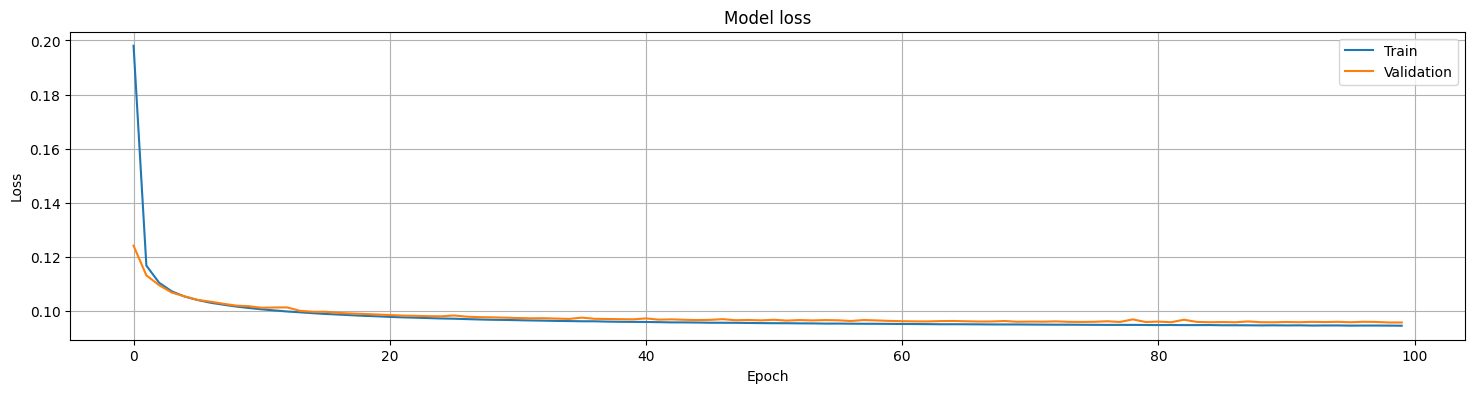

In [217]:
#Configure the model for training
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

#Model Training
log = autoencoder1.fit(x_train_noisy, x_train, epochs=20, batch_size=128, shuffle=True, validation_split=0.1)

#Plot loss curves
plot_curve(log)

### 4.4 Display Results

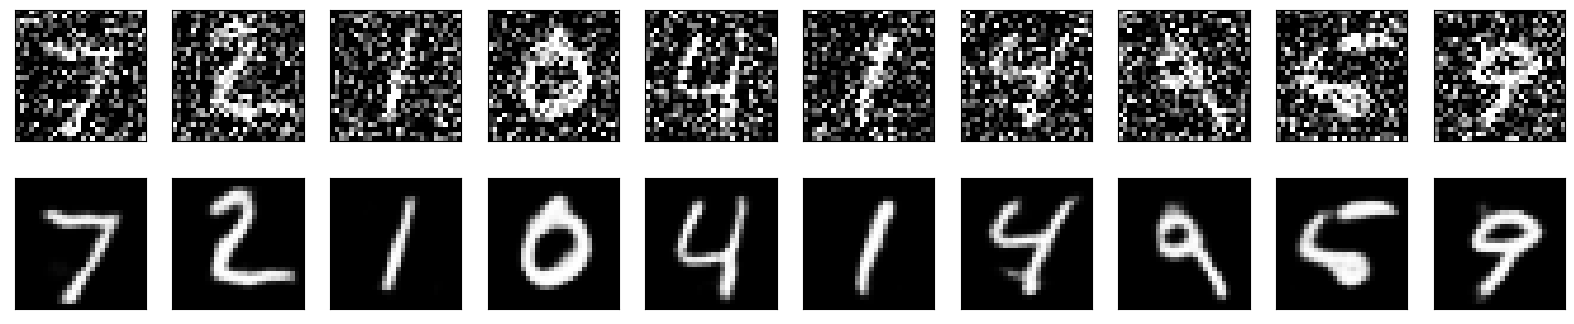

In [221]:
#Get the encoded values for test images
encoded_img = encoder1(x_test_noisy)

#Get the decoded images from the encoded values
decoded_img = decoder1(encoded_img)

#Plot test and decoded images
denoise_pred(decoded_img.numpy())

## 5. Image Colorization using Autoencoder

### 5.1 Converting CIFAR10 Data to Grayscale

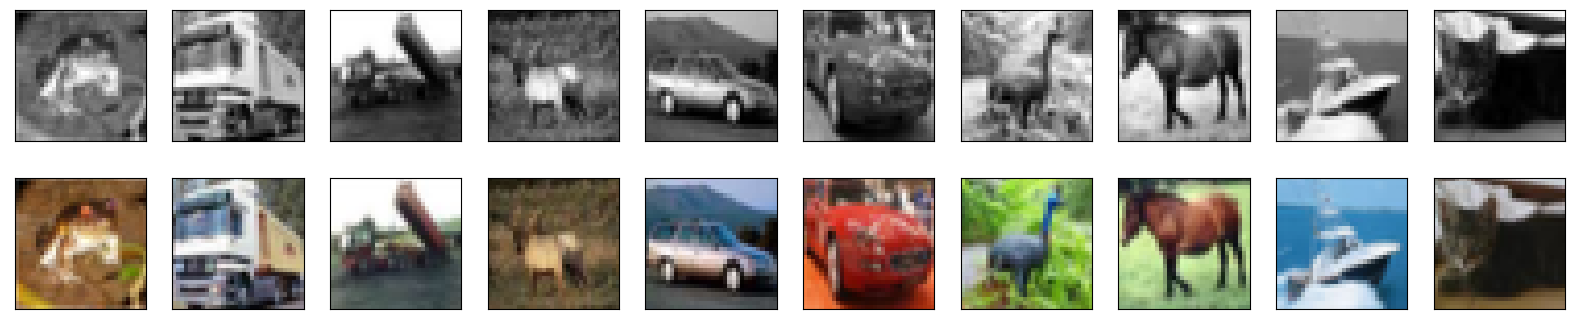

In [222]:
import numpy as np
from keras.datasets import cifar10
(x_train, _), (x_test, _) = cifar10.load_data()

def rgb_2_gray(image):
    return np.dot(image[..., :3], [0.299, 0.587, 0.114])

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train_gray = rgb_2_gray(x_train)
x_test_gray = rgb_2_gray(x_test)
x_train_gray = x_train_gray.astype('float32') / 255.
x_test_gray = x_test_gray.astype('float32') / 255.
x_train_gray = x_train_gray.reshape((len(x_train), 32,32,1))
x_test_gray = x_test_gray.reshape((len(x_test), 32,32,1))

cifar(x_train_gray, x_train)

### 5.2 Model Definition

In [224]:
#define encoder network
encoder2 = keras.Sequential(name='Encoder_CNN')
encoder2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,1), name='E1'))
encoder2.add(layers.MaxPooling2D((2, 2), padding='same', name='E2'))
encoder2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='E3'))
encoder2.add(layers.MaxPooling2D((2, 2), padding='same', name='E4'))
encoder2.summary()

#define decoder network
decoder2 = keras.Sequential(name='Decoder_CNN')
decoder2.add(layers.Conv2DTranspose(32, (3, 3), input_shape=(8,8,32),activation='relu', padding='same', 
                                    strides=2, name='D1'))
decoder2.add(layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', 
                                    strides=2, name='D2'))
decoder2.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='Output'))
decoder2.summary()

#define autoencoder by combining encoder and decoder
input_img = keras.Input(shape=(32,32,1), name='Input_Layer')
z = encoder2(input_img)
output_img = decoder2(z)
autoencoder2 = keras.models.Model(inputs=input_img, outputs=output_img, name='Fully_Convolutional_Autoencoder')
autoencoder2.summary()

Model: "Encoder_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 E1 (Conv2D)                 (None, 32, 32, 32)        320       
                                                                 
 E2 (MaxPooling2D)           (None, 16, 16, 32)        0         
                                                                 
 E3 (Conv2D)                 (None, 16, 16, 32)        9248      
                                                                 
 E4 (MaxPooling2D)           (None, 8, 8, 32)          0         
                                                                 
Total params: 9568 (37.38 KB)
Trainable params: 9568 (37.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Decoder_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


### 5.3 Model Training

Epoch 1/100
352/352 [==============================] - 10s 26ms/step - loss: 0.6270 - val_loss: 0.5944
Epoch 2/100
352/352 [==============================] - 9s 26ms/step - loss: 0.5886 - val_loss: 0.5868
Epoch 3/100
352/352 [==============================] - 9s 26ms/step - loss: 0.5835 - val_loss: 0.5850
Epoch 4/100
352/352 [==============================] - 9s 26ms/step - loss: 0.5812 - val_loss: 0.5824
Epoch 5/100
352/352 [==============================] - 9s 26ms/step - loss: 0.5800 - val_loss: 0.5810
Epoch 6/100
352/352 [==============================] - 9s 26ms/step - loss: 0.5791 - val_loss: 0.5802
Epoch 7/100
352/352 [==============================] - 9s 26ms/step - loss: 0.5783 - val_loss: 0.5802
Epoch 8/100
352/352 [==============================] - 9s 26ms/step - loss: 0.5777 - val_loss: 0.5789
Epoch 9/100
352/352 [==============================] - 9s 26ms/step - loss: 0.5771 - val_loss: 0.5790
Epoch 10/100
352/352 [==============================] - 9s 26ms/step - loss: 0.57

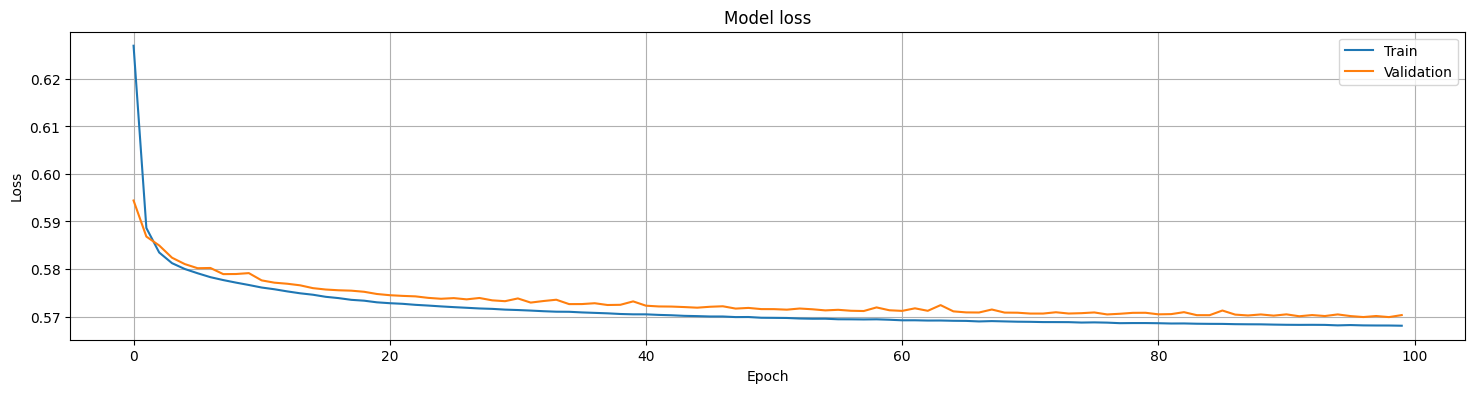

In [225]:
#Configure the model for training
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

#Model Training
log = autoencoder2.fit(x_train_gray, x_train, epochs=100, batch_size=128, shuffle=True, validation_split=0.1)

#Plot loss curves
plot_curve(log)

### 5.4 Display Results

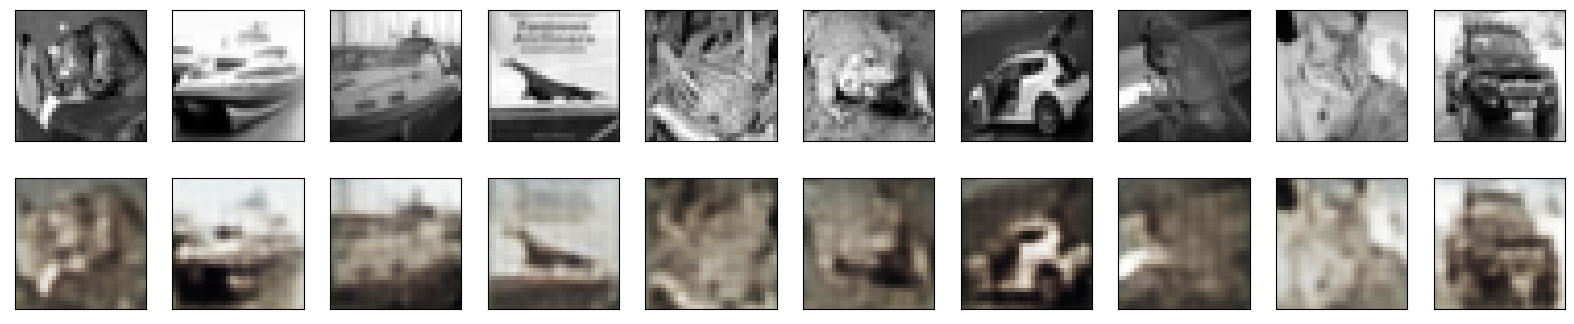

In [226]:
#Get the encoded values for test images
encoded_img = encoder2(x_test_gray)

#Get the decoded images from the encoded values
decoded_img = decoder2(encoded_img)

#Plot test and decoded images
cifar(x_test_gray,decoded_img)